# Computational Finance and FinTech, Problem Set 7
## (c) Prof. Dr. N. Packham, HWR Berlin
## Exercise 1

In [1]:
import math
import numpy as np
import scipy as sp
import scipy.stats as scs
import matplotlib.pyplot as plt

def callprice(S,K,T,sigma,r):
    d1=(sp.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma * sp.sqrt(T))
    d2=(sp.log(S/K) + (r - 0.5 * sigma**2)*T) / (sigma * sp.sqrt(T))
    return S*scs.norm.cdf(d1) - math.exp(-r *T) * K * scs.norm.cdf(d2)

def delta(S, K, T, sigma, r):
    d1=(math.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma * math.sqrt(T))
    return scs.norm.cdf(d1) 

def gamma(S, K, T, sigma, r):
    d1=(math.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma * math.sqrt(T))
    return scs.norm.pdf(d1) / (S * sigma * math.sqrt(T))

def vega(S, K, T, sigma, r):
    d1=(math.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma * math.sqrt(T))
    return S * math.sqrt(T) * scs.norm.pdf(d1)

In [7]:
callprice(100, 100, 1, 0.2, 0.05)

10.450583572185565

In [8]:
delta(100, 100, 1, 0.2, 0.05)

0.6368306511756191

In [9]:
gamma(100, 100, 1, 0.2, 0.05)

0.018762017345846895

In [10]:
vega(100, 100, 1, 0.2, 0.05)

37.52403469169379

Call price change if stock goes up/down by 1 EUR
This is approx. equal to Delta. The difference comes from discretising to a 1 EUR stock price change.

In [13]:
callprice(101, 100, 1, 0.2, 0.05) - callprice(100, 100, 1, 0.2, 0.05)

0.646124555251852

In [14]:
callprice(99, 100, 1, 0.2, 0.05) - callprice(100, 100, 1, 0.2, 0.05)

-0.6273648345539655

Call price change if volatility goes up/down by 1 percentage point
This is approx. equal to vega multiplied by 0.01

In [17]:
callprice(100, 100, 1, 0.21, 0.05) - callprice(100, 100, 1, 0.2, 0.05)

0.37570374206513435

In [18]:
callprice(100, 100, 1, 0.19, 0.05) - callprice(100, 100, 1, 0.2, 0.05)

-0.37471591905303825

## Exercise 2
For (a) see Exercise 1

(b) Solve the linear system that makes the extended portfolio both gamma- and delta-neutral:

In [31]:
[d,g] = np.linalg.solve(np.array([[1, delta(100, 110, 1, 0.2, 0.05)], [0, gamma(100, 110, 1, 0.2, 0.05)]]),\
                np.array([-delta(100, 100, 1, 0.2, 0.05),-gamma(100, 100, 1, 0.2, 0.05)]))
[d,g]

[-0.21049691184601946, -0.9481501198625805]

Stock price appreciation by 1 EUR:

In [33]:
(callprice(101 ,100, 1, 0.2, 0.05) + d * 101 + g * callprice(101, 110, 1, 0.2, 0.05)) \
- (callprice(100 ,100, 1, 0.2, 0.05) + d *100 + g * callprice(100, 110, 1, 0.2, 0.05))

-7.372190427545888e-05

Stock price depreciation by 1 EUR:

In [34]:
(callprice(99 ,100, 1, 0.2, 0.05) + d * 99 + g * callprice(99, 110, 1, 0.2, 0.05)) \
- (callprice(100 ,100, 1, 0.2, 0.05) + d *100 + g * callprice(100, 110, 1, 0.2, 0.05))

7.525476497249883e-05

(c) Solve the linear system that makes the position vega-, gamma- and delta-neutral:

In [35]:
[d, g, v] = np.round(np.linalg.solve(np.array([[1, delta(100, 110, 1, 0.2, 0.05), delta(100, 90, 1, 0.2, 0.05)], \
                          [0, gamma(100, 110, 1, 0.2, 0.05), gamma(100, 90, 1, 0.2, 0.05)], \
                          [0, vega(110, 110, 1, 0.2, 0.05), vega(100, 90, 1, 0.2, 0.05)]]),\
                np.array([-delta(100, 100, 1, 0.2, 0.05),-gamma(100, 100, 1, 0.2, 0.05),\
                         -vega(100, 100, 1, 0.2, 0.05)])), 5)
[d, g, v]

[0.48174, -0.0, -1.38146]

Value change if stock appreciates / depreciates by 1 EUR:

In [38]:
np.round((callprice(101 ,100, 1, 0.2, 0.05) + d * 101 + g * callprice(101, 110, 1, 0.2, 0.05) + v * callprice(101, 90, 1, 0.2, 0.05)) \
- (callprice(100 ,100, 1, 0.2, 0.05) + d * 100 + g * callprice(100, 110, 1, 0.2, 0.05) + v * callprice(100, 90, 1, 0.2, 0.05)) , 5)

8e-05

In [40]:
np.round((callprice(99 ,100, 1, 0.2, 0.05) + d * 99 + g * callprice(99, 110, 1, 0.2, 0.05) + v * callprice(99, 90, 1, 0.2, 0.05)) \
- (callprice(100 ,100, 1, 0.2, 0.05) + d * 100 + g * callprice(100, 110, 1, 0.2, 0.05) + v * callprice(100, 90, 1, 0.2, 0.05)) , 5)

-8e-05

Value change if vega appreciates / depreciates by 1 percentage point:

In [41]:
(callprice(100 ,100, 1, 0.21, 0.05) + d * 100 + g * callprice(100, 110, 1, 0.21, 0.05) + v * callprice(100, 90, 1, 0.21, 0.05)) \
- (callprice(100 ,100, 1, 0.2, 0.05) + d * 100 + g * callprice(100, 110, 1, 0.2, 0.05) + v * callprice(100, 90, 1, 0.2, 0.05)) 

-0.004881766668518139

In [42]:
(callprice(100 ,100, 1, 0.19, 0.05) + d * 100 + g * callprice(100, 110, 1, 0.19, 0.05) + v * callprice(100, 90, 1, 0.19, 0.05)) \
- (callprice(100 ,100, 1, 0.2, 0.05) + d * 100 + g * callprice(100, 110, 1, 0.2, 0.05) + v * callprice(100, 90, 1, 0.2, 0.05)) 

-0.0052806668607416896

Changes in hedged positions:

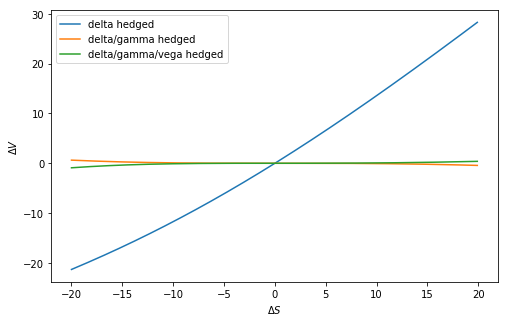

In [26]:
s = np.arange(80, 120, 0.1)
ds = s-100
plt.figure(figsize=(8, 5))
x = delta(100,100,1, 0.2, 0.05)
plt.plot(ds, ((callprice(100+ds, 100, 1, 0.2, 0.05)-callprice(100,100,1,0.2,0.05)) + x * ds), label='delta hedged')
[x,y] = np.linalg.solve(np.array([[1, delta(100, 110, 1, 0.2, 0.05)], [0, gamma(100, 110, 1, 0.2, 0.05)]]),\
                np.array([-delta(100, 100, 1, 0.2, 0.05),-gamma(100, 100, 1, 0.2, 0.05)]))
plt.plot(ds, ((callprice(100+ds, 100, 1, 0.2, 0.05) -callprice(100,100,1,0.2,0.05)) + x * ds \
              + y * (callprice(100+ds, 110, 1, 0.2, 0.05) - callprice(100, 110, 1, 0.2, 0.05))), label='delta/gamma hedged')
[x,y,z] = np.round(np.linalg.solve(np.array([[1, delta(100, 110, 1, 0.2, 0.05), delta(100, 90, 1, 0.2, 0.05)], \
                          [0, gamma(100, 110, 1, 0.2, 0.05), gamma(100, 90, 1, 0.2, 0.05)], \
                          [0, vega(110, 110, 1, 0.2, 0.05), vega(100, 90, 1, 0.2, 0.05)]]),\
                np.array([-delta(100, 100, 1, 0.2, 0.05),-gamma(100, 100, 1, 0.2, 0.05),\
                         -vega(100, 100, 1, 0.2, 0.05)])), 5)
plt.plot(ds, (callprice(100+ds, 100, 1, 0.2, 0.05) -callprice(100,100,1,0.2,0.05)) + x * ds \
              + y * (callprice(100+ds, 110, 1, 0.2, 0.05) - callprice(100, 110, 1, 0.2, 0.05)) \
              + z * (callprice(100+ds, 90, 1, 0.2, 0.05) - callprice(100, 90, 1, 0.2, 0.05)), label='delta/gamma/vega hedged')
plt.xlabel('$\Delta S$')
plt.ylabel('$\Delta V$')
plt.legend()
plt.savefig('hedge1.pdf')

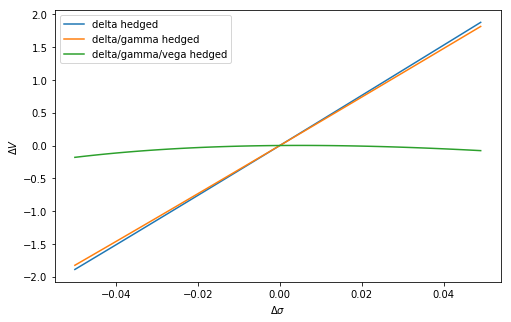

In [27]:
s = np.arange(0.15, 0.25, 0.001)
ds = s-.2
plt.figure(figsize=(8, 5))
x = delta(100,100,1, 0.2, 0.05)
plt.plot(ds, ((callprice(100, 100, 1, 0.2+ds, 0.05)-callprice(100,100,1,0.2,0.05)) + x * ds), label='delta hedged')
[x,y] = np.linalg.solve(np.array([[1, delta(100, 110, 1, 0.2, 0.05)], [0, gamma(100, 110, 1, 0.2, 0.05)]]),\
                np.array([-delta(100, 100, 1, 0.2, 0.05),-gamma(100, 100, 1, 0.2, 0.05)]))
plt.plot(ds, ((callprice(100, 100, 1, 0.2+ds, 0.05) -callprice(100,100,1,0.2,0.05)) + x * ds \
              + y * (callprice(100+ds, 110, 1, 0.2, 0.05) - callprice(100, 110, 1, 0.2, 0.05))), label='delta/gamma hedged')
[x,y,z] = np.round(np.linalg.solve(np.array([[1, delta(100, 110, 1, 0.2, 0.05), delta(100, 90, 1, 0.2, 0.05)], \
                          [0, gamma(100, 110, 1, 0.2, 0.05), gamma(100, 90, 1, 0.2, 0.05)], \
                          [0, vega(110, 110, 1, 0.2, 0.05), vega(100, 90, 1, 0.2, 0.05)]]),\
                np.array([-delta(100, 100, 1, 0.2, 0.05),-gamma(100, 100, 1, 0.2, 0.05),\
                         -vega(100, 100, 1, 0.2, 0.05)])), 5)
plt.plot(ds, (callprice(100, 100, 1, 0.2+ds, 0.05) -callprice(100,100,1,0.2,0.05)) + x * ds \
              + y * (callprice(100, 110, 1, 0.2+ds, 0.05) - callprice(100, 110, 1, 0.2, 0.05)) \
              + z * (callprice(100, 90, 1, 0.2+ds, 0.05) - callprice(100, 90, 1, 0.2, 0.05)), label='delta/gamma/vega hedged')
plt.xlabel('$\Delta \sigma$')
plt.ylabel('$\Delta V$')
plt.legend()
plt.savefig('hedge2.pdf')

## Exercise 3

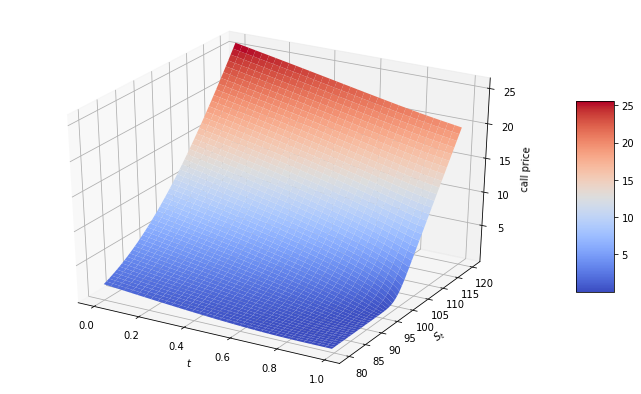

In [45]:
t = np.arange(0,1,0.01)
s = np.arange(80, 120, 0.25)

c = np.empty((len(s), len(t)))
for i in range(len(s)):
    for j in range(len(t)):
        c[i,j] = callprice(s[i], 100, 1-t[j], 0.2, 0.05)
        
t, s = np.meshgrid(t, s) 

from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize=(12, 7)) 
ax = fig.gca(projection='3d')   # set up canvas for 3D plotting
surf = ax.plot_surface(t, s, c, rstride=3, cstride=3,\
                       cmap=plt.cm.coolwarm, linewidth=0.5,\
                       antialiased=True)
ax.set_ylabel('$S_t$')  
ax.set_xlabel('$t$')  
ax.set_zlabel('call price')  
fig.colorbar(surf, shrink=0.5, aspect=5);  
plt.savefig('call.pdf')

## Exercise 4

In [47]:
S0=100
r=0.05
sigma=0.2
T1=1
T2=2
K1=10
K2=100

The code below calculates the theoretical price of the compound option (see e.g. Hull: Options, futures and other derivatives.)

In [48]:
a1=(sp.log(S0/99.285) + (r+0.5* sigma**2/2)*T1) / (sigma* sp.sqrt(T1))
b1=(sp.log(S0/K2) + (r+0.5*sigma**2)*T2) / (sigma*sp.sqrt(T2))
a2=a1-sigma*sp.sqrt(T1)
b2=b1-sigma*sp.sqrt(T2)

rho=[[1,sp.sqrt(T1/T2)], [sp.sqrt(T1/T2),1]]

S0 *  scs.multivariate_normal.cdf([a1,b1], cov=rho)\
- sp.exp(-r * T2) * K2 * scs.multivariate_normal.cdf([a2,b2], cov=rho)\
- sp.exp(-r * T1) * K1 * scs.norm.cdf(a2)

8.846451112609381

Monte Carlo simulation:

[8.806289105698648, 8.887635418335117, 8.968981730971592]

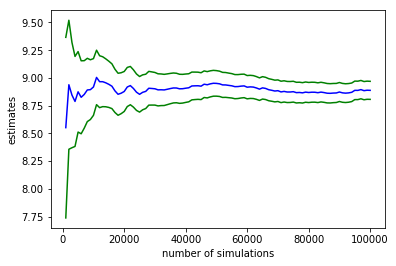

In [49]:
n=100000
w = np.random.standard_normal(n)  # random numbers
s = 100 * np.exp((0.05 - 0.5 * 0.2**2) * 1 + 0.2 * sp.sqrt(1) * w) # stock price simulations
p = (callprice(s, 100, 1, 0.2, 0.05)-10) # payoff of compound option (first part, without max(...,0) conditions)
y = np.exp(-0.05 *1) * (p + abs(p))/2 # payoff of compound option (second part, apply max(...,0) + discounting)

# All that is left to do is to calculate the sample mean of y; 
# here we calculate the sample mean and confidence intervals for various sample sizes
y_m = []
y_cfl = []
y_cfu = []
for i in range(1000, n+1, 1000):
    y_m.append(np.mean(y[:i]))
    y_cfl.append(np.mean(y[:i] - 1.96 * np.std(y[:i])/np.sqrt(i)))    
    y_cfu.append(np.mean(y[:i] + 1.96 * np.std(y[:i])/np.sqrt(i)))

plt.plot(range(1000,n+1,1000), y_m, 'b', \
         range(1000,n+1,1000), y_cfl, 'g', range(1000,n+1,1000), y_cfu, 'g');
plt.xlabel('number of simulations');
plt.ylabel('estimates');

# Confidence interval and point estimate
[y_cfl[-1], y_m[-1], y_cfu[-1]]

## Exercise 5

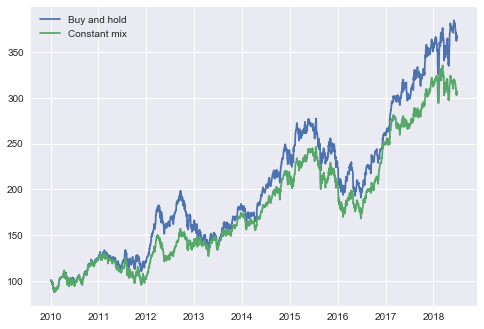

In [54]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')

# load data and transform to returns
filename = './data/tr_eikon_eod_data.csv'
data = pd.read_csv(filename, index_col=0, parse_dates=True)
data.dropna(inplace=True)
rets = (data-data.shift(1)) / data.shift(1)

rets.dropna(inplace=True)

buyhold = 50 * (1+rets['AAPL.O']).cumprod() + 50 * (1+rets['GS.N']).cumprod()

constmix = pd.Series(index=rets.index) # Series object to hold constant mix strategy

constmix.iloc[0]=100; # starting value
value=100;
for t in rets.index: # iterate through time, updating the portfolio value
    constmix.loc[t] = value * (1+0.5 * rets['AAPL.O'].loc[t] + 0.5 * rets['GS.N'].loc[t])
    value=constmix.loc[t]

plt.figure()
plt.plot(buyhold, label='Buy and hold')
plt.plot(constmix, label='Constant mix')
plt.legend()
plt.savefig("strategies.pdf");